In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from itertools import product

pd.set_option('display.max_columns', None)

In [ ]:
# this cell may take up to 30 seconds to run to convert the Hugginface Dataset class to Pandas DataFrame for better EDA

HF_SPOTIFY_DATASET_PATH = "maharshipandya/spotify-tracks-dataset"
# https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

ds = load_dataset(HF_SPOTIFY_DATASET_PATH) #only has 'train' split as key
df = pd.DataFrame(ds["train"])

# Note: Used 10% of the data due to runtime crashing
# stratified based on genre
df, _ = train_test_split(
    df,
    train_size=0.1,
    random_state=42
)
print(df.shape)
df.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

dataset.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114000 [00:00<?, ? examples/s]

(11400, 21)


Unnamed: 0                track_id             artists  \
35233       35233  6Y4xjRYARwm3i0xR8a3gai         Zé Vaqueiro   
96494       96494  0B52FTK1sTf84zLxHWWPTv        Luiz Melodia   
54545       54545  3BwVIkG4kVsPbDbZpd4vmV    Serph;Yui Makino   
14274       14274  2hbbibOJ1iyxAAgMBtPTH2             Cri-Cri   
7848         7848  4L0PUCMFIlPwARhJhggRFo  Greensky Bluegrass   

                                album_name  \
35233                        Vibe Original   
96494                          Ressaquinha   
54545              Disney Glitter Melodies   
14274  Las 100 Clásicas de Cri Cri, Vol. 2   
7848                    All Access, Vol. 1   

                                              track_name  popularity  \
35233                             Você Conta ou Eu Conto          45   
96494                                           O menino           0   
54545  Let It Go (End Credit Version) - Japanese Version          12   
14274                                      La Muñeca Fea          38   
7848                                Time/Breathe Reprise          21   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
35233       190995     False         0.696   0.826    7    -4.552     0   
96494       159880     False         0.543   0.784    5    -7.530     1   
54545       236986     False         0.284   0.609    7    -7.299     1   
14274       192466     False         0.387   0.201    9   -11.593     0   
7848        338240     False         0.413   0.745    6    -6.341     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
35233       0.0549         0.616          0.000001    0.0795    0.458   
96494       0.1120         0.345          0.000000    0.2200    0.966   
54545       0.0337         0.176          0.000000    0.4010    0.121   
14274       0.0568         0.856          0.000000    0.3350    0.296   
7848        0.0318         0.129          0.000031    0.6640    0.626   

         tempo  time_signature track_genre  
35233  145.949               4       forro  
96494  112.489               4       samba  
54545  139.954               4         idm  
14274   74.286               4    children  
7848   133.131               4   bluegrass

In [ ]:
y = df["track_genre"] # classify genres
df_numeric = df.select_dtypes(include=['int64', 'float64']).drop(["Unnamed: 0", "mode", "time_signature", "key"], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)
df_scaled

popularity  duration_ms  danceability    energy  loudness  speechiness  \
0        0.516301    -0.372317      0.738843  0.740416  0.733394    -0.277158   
1       -1.500808    -0.693033     -0.141679  0.574274  0.148004     0.276329   
2       -0.962912     0.101733     -1.632235 -0.117986  0.193412    -0.482656   
3        0.202529    -0.357155     -1.039465 -1.731942 -0.650667    -0.258740   
4       -0.559490     1.145403     -0.889834  0.419999  0.381728    -0.501073   
...           ...          ...           ...       ...       ...          ...   
11395    0.695600    -0.664863     -0.078373 -2.496870 -4.380219    -0.322716   
11396   -0.156068     0.133438      0.698558 -0.335554  0.016301    -0.073599   
11397   -1.500808    -0.936021      0.353255 -0.311819 -0.623540    -0.302360   
11398    0.471477    -0.105911     -0.843794 -2.103785 -1.357931    -0.484594   
11399    0.964548    -1.029881     -0.015068 -1.577667 -2.043376    -0.383784   

       acousticness  instrumentalness  liveness   valence     tempo  
0          0.896180         -0.504240 -0.695796 -0.053379  0.781989  
1          0.082071         -0.504244  0.041908  1.905212 -0.333358  
2         -0.425620         -0.504244  0.992260 -1.352680  0.582153  
3          1.617161         -0.504244  0.645723 -0.677969 -1.606806  
4         -0.566812         -0.504146  2.373158  0.594344  0.354717  
...             ...               ...       ...       ...       ...  
11395      1.794402         -0.501122  0.047158 -1.217738 -0.099589  
11396     -0.680967          2.437819 -0.657992 -1.190749  0.850423  
11397      0.833094         -0.504244 -0.157614  1.573640 -0.119822  
11398      1.893537         -0.504244 -0.650641 -1.364247 -0.609061  
11399      1.842468          2.431382  0.876747 -1.500346 -0.251990  

[11400 rows x 11 columns]

In [ ]:
df_scaled.isna().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [ ]:
# encode y strings into int

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = y_encoded
y

array([ 35,  96,  54, ..., 103,   0,  15])

In [ ]:
print("Unique values in y:", np.unique(y))


Unique values in y: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113]


In [ ]:
import pandas as pd

# If y is a NumPy array, convert it to a Pandas Series
y_series = pd.Series(y)

class_distribution = y_series.value_counts()
pd.set_option('display.max_rows', None)
print("Class Distribution:\n", class_distribution)

Class Distribution:
 23     125
5      121
76     120
26     119
103    118
94     117
46     116
19     116
55     114
86     114
93     114
20     113
105    113
61     112
35     111
57     111
112    110
10     110
50     110
27     109
28     109
15     108
89     108
1      108
11     107
42     106
13     106
87     105
71     105
0      105
37     105
78     105
6      105
85     105
80     105
34     105
66     105
7      104
100    104
3      104
90     104
70     104
25     104
99     103
39     103
75     103
108    103
32     102
102    102
2      102
44     102
82     101
45     100
83     100
96     100
79     100
47     100
18     100
68     100
110    100
29      99
36      99
33      99
84      98
77      98
49      98
38      98
30      98
113     98
73      97
104     97
9       97
16      96
106     96
67      96
21      95
48      95
4       95
8       95
72      94
22      94
74      94
56      93
88      93
60      93
51      93
92      93
91      93
17      92


In [ ]:
from scipy.stats import f_oneway, kruskal

# Example using ANOVA
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy',
                  'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']

for col in numerical_cols:
    groups = [df_scaled[col][y_encoded == g] for g in np.unique(y_encoded)]
    f_stat, p_value = f_oneway(*groups)
    print(f"{col}: ANOVA F-statistic={f_stat:.2f}, p-value={p_value:.3e}")

popularity: ANOVA F-statistic=34.11, p-value=0.000e+00
duration_ms: ANOVA F-statistic=22.92, p-value=0.000e+00
danceability: ANOVA F-statistic=76.44, p-value=0.000e+00
energy: ANOVA F-statistic=89.07, p-value=0.000e+00
loudness: ANOVA F-statistic=85.18, p-value=0.000e+00
speechiness: ANOVA F-statistic=74.68, p-value=0.000e+00
acousticness: ANOVA F-statistic=99.28, p-value=0.000e+00
instrumentalness: ANOVA F-statistic=83.32, p-value=0.000e+00
liveness: ANOVA F-statistic=17.76, p-value=5.207e-313
valence: ANOVA F-statistic=44.91, p-value=0.000e+00
tempo: ANOVA F-statistic=10.50, p-value=4.401e-168


In [ ]:
features_to_keep = ["acousticness"	,	"danceability"	,"energy"	,"duration_ms","valence"	,"loudness"	, "popularity"]
X = df_scaled[features_to_keep]

Split into training, validation, and test set:

In [ ]:
from sklearn.model_selection import train_test_split


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=.2, random_state=123, stratify=y)


X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=.1, random_state=123, stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [ ]:
X_train

acousticness  danceability    energy  duration_ms   valence  loudness  \
5928       0.082071      1.383408 -1.008035     3.336622  1.739426 -1.189666   
5754      -0.779501      0.974800 -0.066561     1.295201 -1.636445 -0.195210   
4195       0.064047     -0.429431 -0.193146    -0.007526  0.116263  0.485321   
1602       2.028721     -1.033710 -1.965333    -0.393468 -1.040385 -1.131481   
277        1.890533     -2.144434 -1.961377    -1.629774 -1.534274 -1.871769   
9512      -0.899064      0.266929  0.890736     0.071171 -0.307841  1.187474   
4884      -0.797826      0.042483  1.013365     1.236109  0.679165  0.956503   
3353       1.548067     -0.469716 -1.799190    -0.026904 -0.909298 -1.621927   
395        0.631820      1.089901 -0.924964    -0.066701 -1.612155 -1.066612   
843       -0.428624     -0.095638  0.811620     0.185707  1.238212  0.672260   
2249      -0.750963      0.439581  0.467468    -0.141482 -1.641071  0.015515   
10132      0.959266     -0.095638 -0.849805    -1.101765  1.747137 -0.481025   
854       -0.736543      0.548927  0.938205    -0.271521  1.469541  0.690148   
2288      -0.954326     -1.304197  1.333782    -1.263932 -0.280853  0.520704   
1436       1.133503      0.980555 -0.727176    -0.541720 -0.118922 -0.088865   
2137      -0.793921      0.393540  0.724593    -0.821660 -0.516038  0.778802   
9782      -0.952089     -1.649500  1.333782     0.009357 -0.481339  1.246643   
9072       0.289354      1.205002 -2.087962    -1.274240  0.324460 -1.206964   
7087      -0.050109      1.412183 -0.454227     0.323188  1.215079 -0.169656   
5129      -0.728732      1.210757 -0.948699    -1.642968 -0.581581 -0.137811   
6367      -0.350517      0.416561  0.095625    -0.889978  0.736997  0.150756   
8070       1.869505     -2.921365 -2.206635     1.720971 -1.679626 -3.151844   
11207     -0.098174      0.980555  0.902603    -0.227601  1.087847  0.961810   
5509       1.001323      0.295705 -1.799190     0.493282 -0.319408 -0.778241   
10711     -0.515742      0.848189  0.249900    -0.238269 -0.897732  0.370523   
7894       0.890172     -0.423676 -0.592679     0.553065 -0.211454 -0.151375   
4986       1.989668     -0.786244 -1.443171    -0.624324  0.517234 -1.289524   
916       -0.715514     -0.371880  0.427910     1.649716 -1.090507  0.136013   
1525      -0.953063      0.525906  1.274446     0.438858  0.251205  0.533677   
10481     -0.953982     -0.855304  1.306092    -0.383594 -0.165188  0.655552   
4580      -0.641914      1.164716  0.736461     0.644049  1.928345  0.102399   
2047       1.181568      0.238154 -0.810247    -0.887370  1.176524 -0.234918   
1433      -0.455661     -1.212117  1.290269     0.505682 -1.186894  0.778409   
6735      -0.886147      0.612232  1.021276    -0.253730  0.952905  0.717865   
1148      -0.953549     -0.498491  1.416854     0.139252 -0.292419  0.334943   
7834       0.773012      0.951780 -0.632237    -0.629952  0.050720 -0.194031   
7123       0.727951     -0.176209 -0.466095    -0.683138  1.885935 -0.598182   
2492       1.512018     -0.602082 -1.514375    -0.424823 -0.770501 -0.777062   
5164      -0.953519     -0.251024  1.195330    -0.851026 -0.485194  0.888686   
7668      -0.954087     -0.492736  1.195330     0.662870 -0.874599  0.595008   
2039      -0.914085      0.387785  0.799753    -0.065784 -0.184466  0.570829   
9432      -0.224346     -0.009313 -0.414669     1.154886 -0.276997  0.170806   
7086      -0.947490      0.341745  0.463512    -0.201306 -0.770501  1.145801   
10618      1.656214     -0.187719 -1.637003    -0.436316 -0.516038 -1.097277   
7000      -0.950644     -1.056731  0.867001    -0.946525  1.346165  0.526601   
4654      -0.703498     -0.268290  0.843267     0.597047  0.197228  0.642578   
186        1.827447     -0.170454 -0.932876     0.263261  0.690732  0.055615   
10820      1.731317     -0.262535 -2.020714    -0.403899 -1.341114 -2.051043   
1685      -0.455661      1.389163  0.151006     0.957993  1.554362  0.679730   
3612   

<br>
<br>

In [ ]:
y_train

array([ 13,  32,  11, ...,  40,  55, 108])

## Implementing a multi-layer perceptron

In [ ]:
import numpy as np

In [ ]:
##########################
### MODEL
##########################

def sigmoid(z):
    return 1. / (1. + np.exp(-z))


def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary


class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()

        self.num_classes = num_classes

        # hidden
        rng = np.random.RandomState(random_seed)

        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):

        #########################
        ### Output layer weights
        #########################

        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use

        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights

        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h

        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)


        #################################
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight

        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out

        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative

        # [n_examples, n_features]
        d_z_h__d_w_h = x

        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out,
                d_loss__d_w_h, d_loss__d_b_h)

In [ ]:
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

print(num_features, num_classes)

num_hidden = 83 #(num_features+num_class) * 2/3

model = NeuralNetMLP(num_features, num_hidden, num_classes)

7 114


## Coding the neural network training loop

Defining data loaders:

In [ ]:
import numpy as np

num_epochs = 50
minibatch_size = 100


def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X.iloc[batch_idx], y[batch_idx]


# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size)

    for X_train_mini, y_train_mini in minibatch_gen:

        break

    break

print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 7)
(100,)


Defining a function to compute the loss and accuracy

In [ ]:
def mse_loss(targets, probas, num_labels = 114):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)


_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas, num_classes)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 1.0%


In [ ]:
def compute_mse_and_acc(nnet, X, y, num_labels=114, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

In [ ]:
mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

Initial valid MSE: 0.3
Initial valid accuracy: 1.0%


In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):

    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:

            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####

            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out

        #### Epoch Logging ####
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [ ]:
np.random.seed(123) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.01 | Train Acc: 0.82% | Valid Acc: 0.56%
Epoch: 002/050 | Train MSE: 0.01 | Train Acc: 1.16% | Valid Acc: 1.00%
Epoch: 003/050 | Train MSE: 0.01 | Train Acc: 1.24% | Valid Acc: 1.33%
Epoch: 004/050 | Train MSE: 0.01 | Train Acc: 1.43% | Valid Acc: 1.44%
Epoch: 005/050 | Train MSE: 0.01 | Train Acc: 1.63% | Valid Acc: 1.89%
Epoch: 006/050 | Train MSE: 0.01 | Train Acc: 1.76% | Valid Acc: 2.11%
Epoch: 007/050 | Train MSE: 0.01 | Train Acc: 1.87% | Valid Acc: 2.11%
Epoch: 008/050 | Train MSE: 0.01 | Train Acc: 1.94% | Valid Acc: 2.11%
Epoch: 009/050 | Train MSE: 0.01 | Train Acc: 2.10% | Valid Acc: 1.89%
Epoch: 010/050 | Train MSE: 0.01 | Train Acc: 2.16% | Valid Acc: 1.78%
Epoch: 011/050 | Train MSE: 0.01 | Train Acc: 2.20% | Valid Acc: 1.89%
Epoch: 012/050 | Train MSE: 0.01 | Train Acc: 2.21% | Valid Acc: 2.11%
Epoch: 013/050 | Train MSE: 0.01 | Train Acc: 2.22% | Valid Acc: 2.33%
Epoch: 014/050 | Train MSE: 0.01 | Train Acc: 2.22% | Valid Acc: 2.33%
Epoch:

## Evaluating the neural network performance

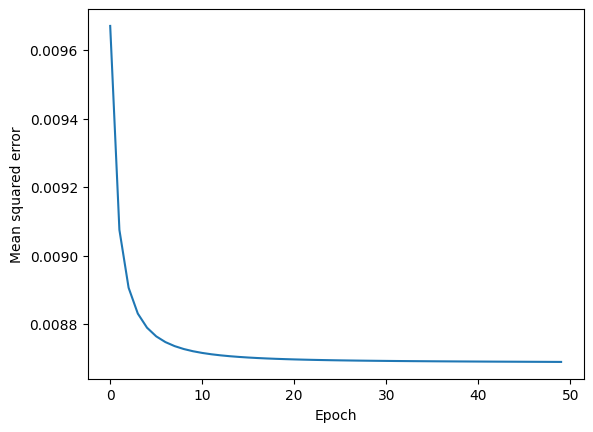

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
#plt.savefig('figures/11_07.png', dpi=300)
plt.show()

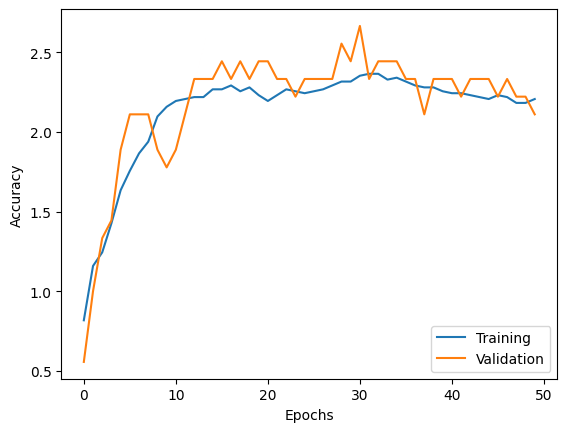

In [ ]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

In [ ]:
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 2.18%


## QUESTION 2
2. Please explain the metrics you are using to assess the performance of your NN.
  - We used validation accuracy to meeasure the performance of the NN, which we get through `compute_mse_and_acc`

##QUESTION 3

3. Please also detail how you trained your NN including how you learned hyperparameters such as learning
rate.
  - We use the following training loop, as defined in `train(model, X_train, y_train, X_valid, y_valid, num_epochs, learning_rate=0.1)`:
    - First iterating through the epochs
    - Iterating through the minibatches of the training data made
    - Calculate the output probabilitys of the NN
    - Backpropagate to get the gradients
    - Update the weights using gradient descent
  - We call `train` with a learning rate of .1

In [ ]:
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>


Citation:

Chapter 11 of

SebastianRaschka, Yuxi (Hayden)Liu, and Vahid Mirjalili.Machine Learningwith PyTorch and Scikit-Learn. Packt Publishing,
2022.